# Importing all of the required Packages

In [19]:
import pandas as pd       #transforming json into panda dataframe
#from googletrans import Translator          #google translate from french to english if needed
import numpy as np                          #for thejaccard similarity
from sklearn.feature_extraction.text import TfidfVectorizer      #extrating features from text
from sklearn.preprocessing import MultiLabelBinarizer            #turn labels into binary
from sklearn.model_selection import train_test_split             #splitting the data to get better results

from sklearn.linear_model import SGDClassifier                  #Classifier models/kernels
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
 
from sklearn.multiclass import OneVsRestClassifier

import nltk #import the natural language toolkit library
from nltk.stem.snowball import FrenchStemmer #import the French stemming library
from nltk.corpus import stopwords #import stopwords from nltk corpus
#import re #import the regular expressions library; will be used to strip punctuation
from collections import Counter #allows for counting the number of occurences in a list

from sklearn.multiclass import OneVsOneClassifier
from nltk import sent_tokenize #split data into multiple sentences
from nltk.tokenize import word_tokenize #tokenize the words
from nltk.corpus import stopwords  #remove stopwords
from nltk.stem.snowball import FrenchStemmer   #not a very accurate stemmer, for testing

# Installing the French Package for SpaCy

In [176]:
#!pip install --user https://github.com/explosion/spacy-models/releases/download/fr_core_news_sm-2.0.0/fr_core_news_sm-2.0.0.tar.gz#egg=fr_core_news_sm==2.0.0
#!python -m pip install --upgrade pip
#!pip install -U spacy
#!python -m spacy download fr_core_news_sm

Using legacy 'setup.py install' for fr-core-news-sm, since package 'wheel' is not installed.
    Running setup.py install for fr-core-news-sm: started
    Running setup.py install for fr-core-news-sm: finished with status 'done'


  Attempting uninstall: fr-core-news-sm
    Found existing installation: fr-core-news-sm 2.0.0
    Uninstalling fr-core-news-sm-2.0.0:
      Successfully uninstalled fr-core-news-sm-2.0.0
[+] Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [177]:
import spacy as sp   #spacy for frenchs
import fr_core_news_sm as fr

# Getting the Json data

In [178]:
a = pd.read_json(r'C:\Users\nicol\Documents\travail\tfe\Thesis-main\dataset.json',encoding='utf-8')

In [179]:
nlp_fr = sp.load('fr_core_news_sm')

In [180]:
a

,_id,address,description,description_HTML,end,feedSource,header,imageUrl,labels,pageUrl,start,status,title,author
0,aeXZbAyKlb,"La Tchafouille, place de l'Eglise 2 - 1341 Cér...",Midi tambouille à la Tchafouille : Moussaka au...,<div class='event' itemscope='' itemtype='http...,2020-03-03T22:59:59.000Z,4BKM94AFhM,Actions citoyennes et solidaires,http://agenda.olln.be/midi-tambouille-a-la-tch...,[autre],http://agenda.olln.be/midi-tambouille-a-la-tch...,2020-03-03T11:00:00.000Z,ok,Midi tambouille à la Tchafouille,NaN
1,Ck5cdpTbxB,Studio 11,"Projection du Kot Cinéforum du film 'Girl', de...","<p>Projection du Kot Cinéforum du film 'Girl',...",2020-02-13T21:45:00.000Z,CARPE,culture,http://louvainfo.be/media/events/Girl_2018_fil...,"[etudiant, cinema]",https://louvainfo.be/calendrier/3658,2020-02-13T19:45:00.000Z,ok,"Projection du film ""Girl"" par le Kot Cinéforum",Kot Cinéforum
2,SvtChXvw7L,Bibliothèque d’Ottignies 2 avenue des Combatt...,Venez vivre un moment doux et chaleureux avec ...,<div class='event' itemscope='' itemtype='http...,2019-12-11T22:59:59.000Z,4BKM94AFhM,Littérature & Contes,http://agenda.olln.be/heure-du-conte/@@images/...,[lecture],http://agenda.olln.be/heure-du-conte,2019-12-11T14:00:00.000Z,ok,Heure du conte,NaN
3,VBFMh18itq,"Point Culture, Place Galilée 9/9A, 1348 Ottign...","Trois jeunes Tunisiennes, ados de la révolutio...",<div class='detail__text col col--full'><div c...,2019-11-28T22:59:00.000Z,POINTCULTURE,cycle,https://static.pointculture.be/media/images/TB...,[cinema],https://www.pointculture.be/agenda/evenements/...,2019-11-28T18:30:00.000Z,ok,Les Fleurs Du Bitume | Take back the night !,NaN
4,dBSJOXPqDq,"Ateliers d'art de la Baraque 1, rue des Artis...",Collage | mercredi 9h30-12h30 | 300€ \r\nUne ...,<details><p><strong>Collage</strong> | mercred...,2019-09-30T21:59:00.000Z,4BKM94AFhM,"Actions citoyennes et solidaires, Ateliers & ...",http://agenda.olln.be/atelier-collage-danse-im...,"[atelier, theatre]",http://agenda.olln.be/atelier-collage-danse-im...,2019-09-29T22:00:00.000Z,ok,"Atelier - Collage, Danse, Image, Théâtre...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,0pfjSAAdEf,"Aula Magna, Place Raymond Lemaire 1, 1348 Otti...",Danse Irlandaise CELTIC LEGENDS. La danse irla...,<div class='single-event--right col-lg-8'><ul ...,2020-02-11T22:59:59.000Z,AULAMAGNA,Danse Irlandaise,https://library.utick.be/activities/323F2F78-5...,[spectacle-danse],http://aulamagna.be/agenda-culturel/?article=3...,2020-02-11T19:00:00.000Z,NaN,CELTIC LEGENDS.,NaN
919,iy9wFqjr54,"Forum des Halles, Office du Tourisme-Inforvill...",\n\n\n \n\n\n \n\n\nLa peintre Nicole Delsaux ...,\n\n\n \n\n\n \n\n\nLa peintre Nicole Delsaux ...,2019-09-15T22:00:00.000Z,INFORVILLE,exposition,http://www.tourisme-olln.be/imf/c/eyJtYXNrIjoi...,"[exposition-peinture, exposition-sculture]",http://www.tourisme-olln.be/fr/la-couleur-et-l...,2019-08-30T22:00:00.000Z,NaN,"La couleur et la pierre, une rencontre",NaN
920,cgEGsd3DH6,Studio 13 - 1348 Louvain-la-Neuve,Par Claude Martin (ancien ambassadeur de Franc...,<div class='event' itemscope='' itemtype='http...,2019-12-09T22:59:59.000Z,4BKM94AFhM,Conférences & Débats,http://agenda.olln.be/la-diplomatie-nest-pas-u...,[conference-politique],http://agenda.olln.be/la-diplomatie-nest-pas-u...,2019-12-09T18:30:00.000Z,,La diplomatie n'est pas un dîner de gala,NaN
921,wP4LHxGIKh,"Ferme du Biéreau, place Polyvalente, avenue du...",Ninalisa \r09.10.2019\r Entre théâtre et m...,"<div class=""BodyMiddleContainer""><div class=""T...",2019-10-09T21:59:59.000Z,INFORVILLE,concert spectacle théâtre,http://www.tourisme-olln.be/imf/c/eyJtYXNrIjoi...,"[spectacle-autre, concert-jazz, concert-classi...",http://www.tourisme-olln.be/fr/ninalisa.html?c...,2019-10-08T22:00:00.000Z,NaN,Ninalisa,NaN


In [181]:
df = [a["description"], a['header'],a['labels'], a['title']]  #specifing which columns to take into consideration when we do the classfication
df = pd.concat(df, axis=1, keys=["description", "header", "labels","title"])

In [182]:
#type(df.labels[0])
df

,description,header,labels,title
0,Midi tambouille à la Tchafouille : Moussaka au...,Actions citoyennes et solidaires,[autre],Midi tambouille à la Tchafouille
1,"Projection du Kot Cinéforum du film 'Girl', de...",culture,"[etudiant, cinema]","Projection du film ""Girl"" par le Kot Cinéforum"
2,Venez vivre un moment doux et chaleureux avec ...,Littérature & Contes,[lecture],Heure du conte
3,"Trois jeunes Tunisiennes, ados de la révolutio...",cycle,[cinema],Les Fleurs Du Bitume | Take back the night !
4,Collage | mercredi 9h30-12h30 | 300€ \r\nUne ...,"Actions citoyennes et solidaires, Ateliers & ...","[atelier, theatre]","Atelier - Collage, Danse, Image, Théâtre..."
...,...,...,...,...
918,Danse Irlandaise CELTIC LEGENDS. La danse irla...,Danse Irlandaise,[spectacle-danse],CELTIC LEGENDS.
919,\n\n\n \n\n\n \n\n\nLa peintre Nicole Delsaux ...,exposition,"[exposition-peinture, exposition-sculture]","La couleur et la pierre, une rencontre"
920,Par Claude Martin (ancien ambassadeur de Franc...,Conférences & Débats,[conference-politique],La diplomatie n'est pas un dîner de gala
921,Ninalisa \r09.10.2019\r Entre théâtre et m...,concert spectacle théâtre,"[spectacle-autre, concert-jazz, concert-classi...",Ninalisa


In [183]:
pp = a['description'][0]
print(pp)

Midi tambouille à la Tchafouille : Moussaka au menu!  Prix : 2 euros. Inscriptions souhaitées. Venez préparer et manger ce délicieux plat grec en notre compagnie! Le rendez-vous est à midi. www.latchafouille.be


In [184]:
#nltk.download('punkt')     #to use with nltk need to be downlaoded first for punctuation
#nltk.download('stopwords')   #stopwords in english/french

# Text Processing Using NLTK

In [231]:
def preprocess_nltk(pp):
    #print("in")
    sentences = sent_tokenize(pp)                          #split into sentences
    tokens = word_tokenize(pp)                             #tokenize words
    tokens = [w.lower() for w in tokens]                  #transforming into lower case
    words = [word for word in tokens if word.isalpha()]    #removing puntuation
    stop_words = stopwords.words('french')   #french stopwords
    words = [w for w in words if not w in stop_words]        #removing stop words
    stemmer = FrenchStemmer()
    stemmed = [stemmer.stem(word) for word in words]   #not very accurate
    #print(stemmed)
    return stemmed

In [232]:
# Python program to convert a list 
# to string using join() function 
    
# Function to convert   
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 
  

In [233]:
desc_nltk = []
for descr in a['description'][:]:
    desc_nltk.append(listToString(preprocess_nltk(descr)))
df['desc_nltk'] = desc_nltk

In [234]:
print(df['desc_nltk'])

0      mid tambouill tchafouill moussak menu prix eur...
1      project kot cinéforum film luk dhondt film bel...
2      ven vivr moment doux chaleur enfant racont his...
3      trois jeun tunisien ados révolu jasmin emparen...
4      collag mercred invit pos regard ludiqu décal i...
                             ...                        
918    dans irlandais celtic legend dans irlandais a ...
919    peintr nicol delsal sculpteur albert contess f...
920    claud martin ancien ambassadeur franc chin vi ...
921    ninalis entre théâtr musiqu duettist chantent ...
922    tryo complet cel fer an déjà group tryo occup ...
Name: desc_nltk, Length: 923, dtype: object


In [235]:
print(preprocess_nltk(df['description'][0]))   #stemmed words using nltk

['mid', 'tambouill', 'tchafouill', 'moussak', 'menu', 'prix', 'euros', 'inscript', 'souhait', 'ven', 'prépar', 'mang', 'délici', 'plat', 'grec', 'compagn', 'mid']



# Text Processing Using SpaCy

In [221]:
import spacy as sp   #spacy for frenchs
import fr_core_news_sm as fr
nlp_fr = sp.load('fr_core_news_sm')

In [222]:
complete_doc = nlp_fr(df['description'][0])
#TODO : The preproccess (stop word, lemma, etc)

# Text Processing Using TreeTagger

In [236]:
with open('description_prepro_with_TreeTagger.txt', 'r', encoding="utf-8") as f:
    temp = f.read() 
desc_treetag = (temp.split('\n'))
del(desc_treetag[-1])
df['desc_treetag'] = desc_treetag

In [239]:
df['desc_treetag']

0      midi tambouille tchafouille moussaka menu prix...
1      projection kot cinéforum film lukas dhondt fil...
2      venir vivre moment doux chaleureux enfant raco...
3      trois jeune tunisien ados révolution jasmin em...
4      collage mercredi invitation poser regard ludiq...
                             ...                        
918    danse irlandais celtic legends danser irlandai...
919    peintre nicole delsaux sculpteur albert contes...
920    claude martin ancien ambassadeur france chiner...
921    ninalisa entre théâtre musique duettiste chant...
922    tryo complet cela faire an déjà grouper tryo o...
Name: desc_treetag, Length: 923, dtype: object

In [ ]:
#!pip install -U treetaggerwrapper
#import nltk
#nltk.download()
import pprint   # For proper print of sequences.
import treetaggerwrapper
#0)remove ponctuation
sentences = sent_tokenize(pp)                          #split into sentences
tokens = word_tokenize(pp)                             #tokenize words
tokens = [w.lower() for w in tokens]                  #transforming into lower case
words = [word for word in tokens if word.isalpha()]    #removing puntuation
stop_words = stopwords.words('french')   #french stopwords
words = [w for w in words if not w in stop_words]        #removing stop words
#1) build a TreeTagger wrapper:
tagger = treetaggerwrapper.TreeTagger(TAGLANG='fr')
#2) tag your text.
tags = tagger.tag_text(words)
tags2 = treetaggerwrapper.make_tags(tags)
#3) use the tags list... (list of string output from TreeTagger).
pprint.pprint(tags2)

    
def preprocess(pp):
    #0)remove ponctuation
    sentences = sent_tokenize(pp)                          #split into sentences
    tokens = word_tokenize(pp)                             #tokenize words
    tokens = [w.lower() for w in tokens]                  #transforming into lower case
    words = [word for word in tokens if word.isalpha()]    #removing puntuation
    stop_words = stopwords.words('french')   #french stopwords
    words = [w for w in words if not w in stop_words]        #removing stop words
    #1) build a TreeTagger wrapper:
    tagger = treetaggerwrapper.TreeTagger(TAGLANG='fr')
    #2) tag your text.
    tags = tagger.tag_text(words)
    tags2 = treetaggerwrapper.make_tags(tags)
    #3) create new description.
    new_descr = []
    for word, tag, lemma in tags2:
        new_descr.append(lemma)
    return new_descr

In [ ]:
alldescr = a["description"]
new_alldescr = []
print(alldescr)
count=0
for descr in alldescr:
    new_alldescr.append(preprocess(descr))
    count += 1
    print(count)
    #if count > 100: break

# Taking Only Principal Labels

In [193]:
print(df.labels)
#labs = ['concert', 'conference', 'exposition', 'spectacle', 'sport'] #c'est seulement les labels qui ont des sous labels
labs = ['atelier', 'autre', 'brocante', 'cinema', 'concert', 'conference',
       'etudiant', 'exposition', 'fete', 'lecture', 'spectacle', 'sport',
       'theatre']
general_labs = []
for tup in df.labels:
    glabs = []
    for word in tup:            
        if word in labs:
            glabs.append(word)
        else :
            for w in word.split("-"):
                if w in labs:
                    glabs.append(w)
                    
    glabs = list(dict.fromkeys(glabs))
    general_labs.append(glabs)

df['general_labels'] = general_labs
#print(df.general_labels)

0                                                [autre]
1                                     [etudiant, cinema]
2                                              [lecture]
3                                               [cinema]
4                                     [atelier, theatre]
                             ...                        
918                                    [spectacle-danse]
919           [exposition-peinture, exposition-sculture]
920                               [conference-politique]
921    [spectacle-autre, concert-jazz, concert-classi...
922         [spectacle-autre, concert-musique francaise]
Name: labels, Length: 923, dtype: object


# Analyze of data

In [ ]:
labs = ['atelier', 'autre', 'brocante', 'cinema', 'concert', 'conference',
       'etudiant', 'exposition', 'fete', 'lecture', 'spectacle', 'sport',
       'theatre']
dict_lab = dict.fromkeys(labs, 0)
for l in df['general_labels']:
    for l1 in l:
        dict_lab[l1] += 1
#print(dict_lab)
print(list(dict_lab.values()))

In [ ]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
categories = list(dict_lab.keys())
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, list(dict_lab.values()))
#plt.title("Unbalanced between labels", fontsize=24)
plt.ylabel('Number of times each label appear', fontsize=18)
plt.xlabel('Name of Labels ', fontsize=18)


In [ ]:
dict_nbrlab = [0,0,0,0,0,0,0,0]
for l in df['general_labels']:
    dict_nbrlab[(len(l))] += 1


sns.set(font_scale = 1.5)
plt.figure(figsize=(15,8))
ax= sns.barplot(list(range(1,8)), dict_nbrlab[1:8])
#plt.title("Unbalanced between labels", fontsize=24)
plt.ylabel('Number of Events', fontsize=24)
plt.xlabel('Number of Labels ', fontsize=24)
print((dict_nbrlab[1]))

# Creating Model

In [ ]:
multilabel = MultiLabelBinarizer()

In [ ]:
y = multilabel.fit_transform(df['general_labels'])

In [ ]:
y

In [ ]:
multilabel.classes_

In [ ]:
pd.DataFrame(y,columns=multilabel.classes_)

In [ ]:
tfidf = TfidfVectorizer(analyzer='word', max_features = 5000, ngram_range=(1,2))

In [ ]:
X = tfidf.fit_transform(df['description'])

#X = tfidf.fit_transform(read_descr_treetag)



In [ ]:
new_alldescr

In [ ]:
X.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

In [ ]:
sgd = SGDClassifier()
lr = LogisticRegression(solver = 'lbfgs')
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()

In [32]:
def j_score(y_true,y_pred):
    jaccard = np.minimum(y_true,y_pred).sum(axis = 1)/np.maximum(y_true, y_pred).sum(axis=1)
    return jaccard.mean()*100


def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jaccard score {}".format(j_score(y_test, y_pred)))
    print('----')

In [ ]:
from sklearn.metrics import hamming_loss
for classifier in [sgd, lr, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    #clf = OneVsOneClassifier(classifier)    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)
    print(hamming_loss(y_test, y_pred))

# Comparing preprocess method

In [245]:
rang = range(1,1000,50)
score=[]
for n_feat in rang:
    multilabel = MultiLabelBinarizer()
    y = multilabel.fit_transform(df['general_labels'])
    tfidf = TfidfVectorizer(analyzer='word', max_features = n_feat, ngram_range=(1,2))
    X = tfidf.fit_transform(df['description'])
    #print((tfidf.get_feature_names()))
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)
    pac = PassiveAggressiveClassifier()
    clf = OneVsRestClassifier(pac)  
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score.append(j_score(y_test, y_pred))

In [246]:
scoretreetag=[]
for n_feat in rang:
    multilabel = MultiLabelBinarizer()
    y = multilabel.fit_transform(df['general_labels'])
    tfidf = TfidfVectorizer(analyzer='word', max_features = n_feat, ngram_range=(1,2))
    X = tfidf.fit_transform(df['desc_treetag'])
    #print((tfidf.get_feature_names()))
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)
    pac = PassiveAggressiveClassifier()
    clf = OneVsRestClassifier(pac)  
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scoretreetag.append(j_score(y_test, y_pred))

In [247]:
scorenltk=[]
for n_feat in rang:
    multilabel = MultiLabelBinarizer()
    y = multilabel.fit_transform(df['general_labels'])
    tfidf = TfidfVectorizer(analyzer='word', max_features = n_feat, ngram_range=(1,2))
    X = tfidf.fit_transform(df['desc_nltk'])
    #print((tfidf.get_feature_names()))
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)
    pac = PassiveAggressiveClassifier()
    clf = OneVsRestClassifier(pac)  
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scorenltk.append(j_score(y_test, y_pred))

In [248]:
#spacy preprocessing not done
scorespacy=[]
for n_feat in rang:
    multilabel = MultiLabelBinarizer()
    y = multilabel.fit_transform(df['general_labels'])
    tfidf = TfidfVectorizer(analyzer='word', max_features = n_feat, ngram_range=(1,2))
    X = tfidf.fit_transform(df['desc_spacy'])
    print((tfidf.get_feature_names()))
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)
    pac = PassiveAggressiveClassifier()
    clf = OneVsRestClassifier(pac)  
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scorespacy.append(j_score(y_test, y_pred))

AttributeError: 'spacy.tokens.doc.Doc' object has no attribute 'lower'

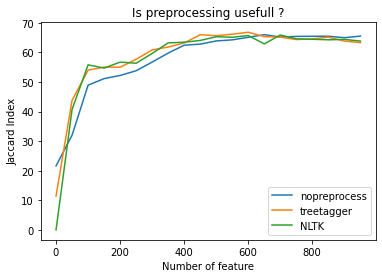

In [249]:
import matplotlib.pyplot as plt
plt.plot(rang, score, label="nopreprocess")
plt.plot(rang, scoretreetag, label="treetagger")
plt.plot(rang, scorenltk, label="NLTK")
# naming the x axis 
plt.xlabel('Number of feature') 
# naming the y axis 
plt.ylabel('Jaccard Index') 
# giving a title to my graph 
plt.title('Is preprocessing usefull ?') 
plt.legend()
plt.show()